In [2]:
# import tools for analyzing timeseries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [3]:
pwd

'c:\\Users\\zin\\Developer\\TAF\\TAF_2_Stationary_Time_Series_PES'

In [4]:
# If you prefer to use Google Drive + Colab, you need to mount your Google drive.
# If you are programming in your local desktop, you don't need to run the code below.
# from google.colab import drive
# # Please mount your drive.
# drive.mount('/content/drive')


.

---


.

${\Large\mathrm{2.5~~~A~Model~of~the~Interest~Rate~Spread}}$

In [5]:
# Please place the sample data to your preferred directory
# Multivariate data
quarterly = pd.read_excel('./TAF_2_Stationary_Time_Series_PES_quarterly.xls',index_col=0)
quarterly.head()

,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
DATE,,,,,,,,,,,,,,,,,,
1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073


In [ ]:
usbond, tbill = quarterly['r5'], quarterly['Tbill']
spread = usbond - tbill
spread.index = pd.to_datetime(spread.index)
spread.index.freq = 'QS-OCT'

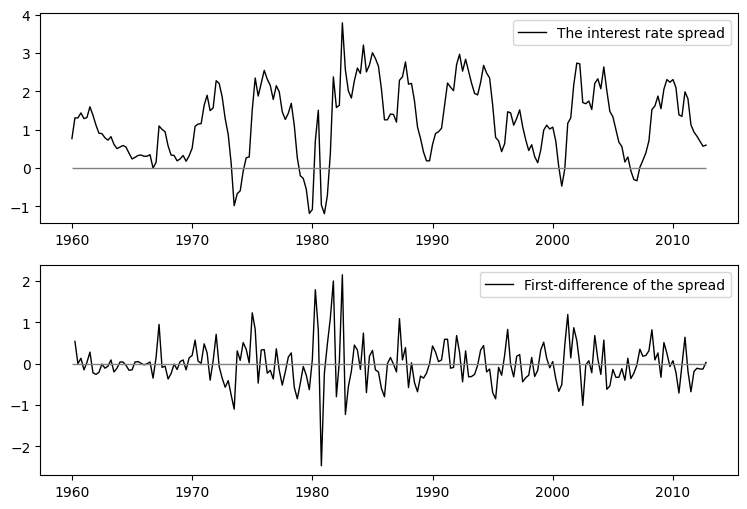

In [5]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 2*3))
axes[0].plot(spread,color='black',linewidth=1,label='The interest rate spread')
axes[0].hlines(xmin=spread.index[0],xmax=spread.index[-1],y=0,color='gray',linewidth=1)
axes[0].legend()
#.diff() pandas 차분지원
axes[1].plot(spread.diff(),color='black',linewidth=1,label='First-difference of the spread')
axes[1].hlines(xmin=spread.index[0],xmax=spread.index[-1],y=0,color='gray',linewidth=1)
axes[1].legend()
plt.show()

The interest spread

1. shows a fair amount of persistence
2. doesn't exhibit any major structual breaks.

Thus, it is reasonable to visually conclude that the interest rate spread is covariance stationary.

The differenced spread seems erratic. We can say that the series is stationary in mean value but inconsistent.

We will estimate a model of interest spread series without any further transformation.

* Note that the null hypothesis of the adf test for spread series has rejected.
* Note that the null hypothesis of the kpss test for spread series hasn't rejected.
-> so it is stationary

kpss vs adf:

ADF의 귀무가설: 단위근 검정법 -> 귀무가설: non - stationary 시계열이다 

KPSS: 시계열은 추세, radom walk, stationary epsilon으로 구성되어있다 -> 귀무가설: trend stationary이거나 stationary이다

In [6]:
def adf_test(dataframe):
  result = adfuller(dataframe)
  print(f'Statistics: {result[0]}')
  print(f'p-value: {result[1]}')
  print(f'Critical values: {result[4]}')

adf_test(spread)
print('---'*40)
adf_test(spread.diff().dropna())
#adf test null: serise is non stationary
#p-value가 0.05보다 작므면 기각(95%유의수준)
#critical value보다 작으면 기각(해당 유의수준내에서)

Statistics: -4.702603696655638
p-value: 8.321012504227712e-05
Critical values: {'1%': -3.4631437906252636, '5%': -2.8759570379821047, '10%': -2.574454682874228}
------------------------------------------------------------------------------------------------------------------------
Statistics: -5.688123744797401
p-value: 8.189105600677066e-07
Critical values: {'1%': -3.463476079125, '5%': -2.876102355, '10%': -2.574532225}


In [7]:
def kpss_test(dataframe):
  result = kpss(dataframe)
  print(f'Statistics: {result[0]}')
  print(f'bounded p-value: {result[1]}')
  print(f'Critical values: {result[3]}')

kpss_test(spread)
print('---'*40)
kpss_test(spread.diff().dropna())

#p-value 기각: 데이터가 non-stationary이다 == 0.05보다 크다, but 결과보면, 큼 : 기각 불가, stationary하다
#statiatiscs와 critical value 비교시, 모두 작음(기각불가) -> stationary함

Statistics: 0.23250592825595803
bounded p-value: 0.1
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
------------------------------------------------------------------------------------------------------------------------
Statistics: 0.020995623795567485
bounded p-value: 0.1
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\zin\AppData\Local\Temp\ipykernel_16716\3801809403.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(dataframe)
C:\Users\zin\AppData\Local\Temp\ipykernel_16716\3801809403.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(dataframe)


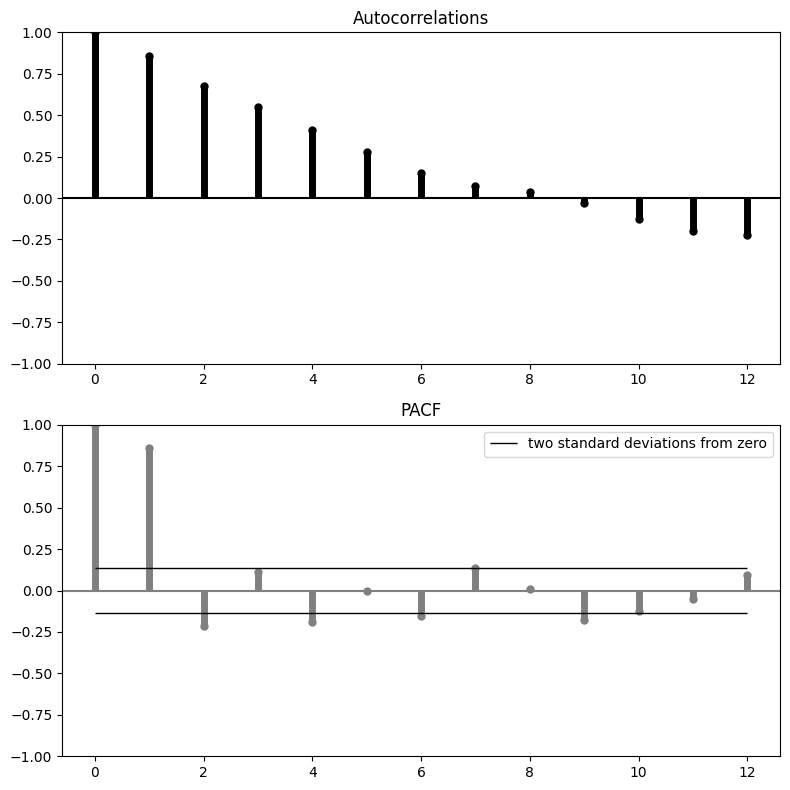

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 2*4))
plot_acf(spread, lags=12, ax=axes[0], title='Autocorrelations', color='black',vlines_kwargs={'colors':'black','linewidth':5}, alpha=None)
plot_pacf(spread, lags=12, ax=axes[1], method='ols', title='PACF', color='gray',vlines_kwargs={'colors':'gray','linewidth':5}, alpha=None)
axes[1].hlines(xmin=0,xmax=12,y=2*np.sqrt(1/len(spread)),label='two standard deviations from zero',color='black',linewidth=1)
axes[1].hlines(xmin=0,xmax=12,y=-2*np.sqrt(1/len(spread)),color='black',linewidth=1)
axes[1].legend()
plt.tight_layout()
plt.show()

Note the following:
1. The ACF and PACF converge to zero quickly enough that we do not have to worry about a nonstationary mean. This means that we don't need to over-difference the spread series.
2. The ACF does not cut to zero so that we can rule out a pure MA(q) process.
3. The ACF is not suggestive of a pure AR(1) process in that the decay does not apear to be geometric. The value of ACF at the first 6 lags seem to decrease quite linearly.
4. Under the null hypothesis of a pure AR(p) model, the estimated value of the PACF at lag p is approximately equal to 1/T where T means the total length of the series and cuts to zero after the lag p. Hence, if we assume the series follows AR process, the value of p could be as high as six or seven.
5. There appears oscillating decay of the PACF which is characteristics of a positive MA coefficient.

Based on the observations, which value of P for an AR model is appropriate?

AR(2)..? look at PACF

In [8]:
# Define a function to get the maximum value(s) from an element in the set
def get_max_value(element):
    if isinstance(element, int) or isinstance(element, float):
        return element
    else:
        return max(element)

In [9]:
lag_list = [(list(range(1,8)), 0, 0), (list(range(1,7)), 0, 0), ([1,2], 0, 0), ([1,2,7], 0, 0), (1, 0, 1), (2, 0, 1), (2, 0, [1,7])]
# AR(7), AR(6), AR(2), p=1,2,7 , ARMA(1,1), ARMA(2,1), p=2;ma=(1,7)
# We will estimate 7 different models.

summary_table = dict()

idx=0
num_of_obs = len(spread[7:])

for lag in lag_list:
    # SSE i.e SSR, AIC, SBC, Ljung–Box Q-statistics of the residual autocorrelations for lag:={4, 8, 12}.
    temp_perf_dict = {key: key for key in ['SSE','AIC','SBC','Q(4)','Q(8)','Q(12)']}

    # Get the maximum value(s) from each element in the set
    max_values = [get_max_value(elem) for elem in lag]
    max_element = max(max_values)
    # We use spread[7-max_element:] to estimate each equation over the 1961Q4-2012Q4.
    res = ARIMA(endog = spread[7-max_element:], order=lag, trend='c').fit(method='innovations_mle') # Use Durbin–Levinson algorithm. You can also use other estimation method.
    temp_perf_dict['SSE'] = round(res.sse,2)
    
    # Note that since we assume the model errors are IID according to a normal distribution, the BIC and AIC formula is bit different from a general form.
    temp_perf_dict['AIC'] = round(num_of_obs*np.log(res.sse) + 2*len(res.params),2)
    temp_perf_dict['SBC'] = round(num_of_obs*np.log(res.sse) + len(res.params)*np.log(num_of_obs),2)
    
    # Ljung-box Q-statistics for lag 4,8,12
    q_statistics = res.test_serial_correlation(method='ljungbox',lags=12)[0]

    temp_perf_dict['Q(4)'] = {'q_stats' : round(q_statistics[0][3],2), 'p_val': round(q_statistics[1][3],2)}
    temp_perf_dict['Q(8)'] = {'q_stats' : round(q_statistics[0][7],2), 'p_val': round(q_statistics[1][7],2)}
    temp_perf_dict['Q(12)'] = {'q_stats' : round(q_statistics[0][11],2), 'p_val': round(q_statistics[1][11],2)}

    for param_name, param in zip(res.params.index, res.params):
        temp_perf_dict[param_name] = {'coef':round(param,2), 't_stats':round(res.tvalues[param_name],2)}
    
    hashable_order = tuple([tuple(order) if isinstance(order,list) == True else order for order in res.specification['order']]) # make res.specification['order'] hashable.
    summary_table[hashable_order] = temp_perf_dict

In [10]:
table_2_4 = pd.DataFrame()
for key, value in summary_table.items():
    temp_series = pd.Series(value, name=key)
    table_2_4 = pd.concat([table_2_4,temp_series],axis=1)

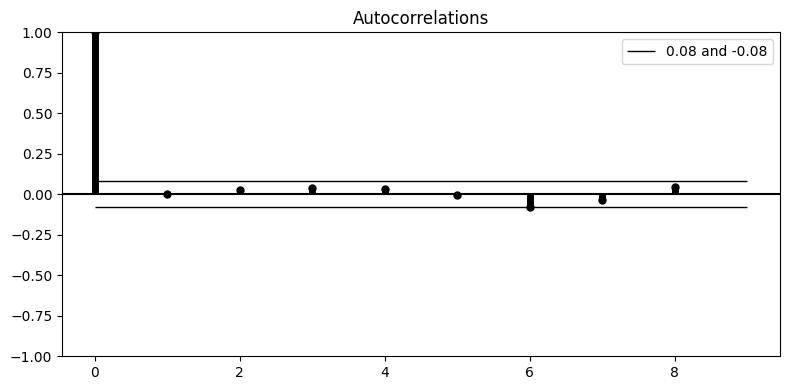

In [11]:
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# the ACF of the last model's residuals.
plot_acf(res.resid, lags=8, ax=axes, title='Autocorrelations', color='black',vlines_kwargs={'colors':'black','linewidth':5}, alpha=None)
axes.hlines(xmin=0,xmax=9,y=0.08,label='0.08 and -0.08',color='black',linewidth=1)
axes.hlines(xmin=0,xmax=9,y=-0.08,color='black',linewidth=1)
axes.legend()
plt.tight_layout()
plt.show()

In [12]:
table_2_4.loc[['const','ar.L1','ar.L2','ar.L3','ar.L4','ar.L5','ar.L6','ar.L7','ma.L1','ma.L7','SSE','AIC','SBC','Q(4)','Q(8)','Q(12)'],:] # For ordering the row of the table.

,"(7, 0, 0)","(6, 0, 0)","(2, 0, 0)","((1, 2, 7), 0, 0)","(1, 0, 1)","(2, 0, 1)","(2, 0, (1, 7))"
const,"{'coef': 1.2, 't_stats': 6.33}","{'coef': 1.21, 't_stats': 7.24}","{'coef': 1.2, 't_stats': 5.79}","{'coef': 1.2, 't_stats': 6.53}","{'coef': 1.21, 't_stats': 6.23}","{'coef': 1.2, 't_stats': 5.62}","{'coef': 1.19, 't_stats': 5.74}"
ar.L1,"{'coef': 1.11, 't_stats': 15.72}","{'coef': 1.09, 't_stats': 17.78}","{'coef': 1.04, 't_stats': 18.45}","{'coef': 1.03, 't_stats': 16.14}","{'coef': 0.76, 't_stats': 14.82}","{'coef': 0.42, 't_stats': 3.07}","{'coef': 0.34, 't_stats': 3.24}"
ar.L2,"{'coef': -0.44, 't_stats': -4.21}","{'coef': -0.42, 't_stats': -4.42}","{'coef': -0.22, 't_stats': -3.91}","{'coef': -0.2, 't_stats': -3.0}",NaN,"{'coef': 0.32, 't_stats': 2.48}","{'coef': 0.4, 't_stats': 4.18}"
ar.L3,"{'coef': 0.39, 't_stats': 4.52}","{'coef': 0.36, 't_stats': 4.26}",NaN,NaN,NaN,NaN,NaN
ar.L4,"{'coef': -0.29, 't_stats': -3.88}","{'coef': -0.24, 't_stats': -3.56}",NaN,NaN,NaN,NaN,NaN
ar.L5,"{'coef': 0.22, 't_stats': 2.24}","{'coef': 0.16, 't_stats': 2.08}",NaN,NaN,NaN,NaN,NaN
ar.L6,"{'coef': -0.29, 't_stats': -2.71}","{'coef': -0.14, 't_stats': -2.62}",NaN,NaN,NaN,NaN,NaN
ar.L7,"{'coef': 0.13, 't_stats': 1.87}",NaN,NaN,"{'coef': -0.03, 't_stats': -0.94}",NaN,NaN,NaN
ma.L1,NaN,NaN,NaN,NaN,"{'coef': 0.38, 't_stats': 5.75}","{'coef': 0.7, 't_stats': 6.17}","{'coef': 0.78, 't_stats': 10.93}"
ma.L7,NaN,NaN,NaN,NaN,NaN,NaN,"{'coef': -0.14, 't_stats': -3.73}"


Note that Ljung–Box Q-statistics can serve as a check to see if the residuals from an estimated ARMA(p, q) model behave as a white-noise process.

(The t-statistics at 5% significance level is 1.93.)

1. AR(7) model
- AR(7) model showed statistically significant coefficient for first 6 lags but didn't for the seventh lag(절대값비교, 작은 경우 0, 상관이 없다)
- All null hypothesis for serial correlation of residuals do not rejected(Q보기)

2. AR(6) model
- With respect to AIC, AR(6) and AR(7) are comparable. However, SBC selects the more parsimonious AR(6) model.
- The q-statistics suggest that you should not try to account to account for the residual autocorrelations at lag 8.

3. AR(2) model
- AIC selects AR(7) over AR(2) but SBC selects a very parsimonious model: AR(2) model. 
- However, AR(2) model indicates significant autocorrelation in the residuals at shorter lags. Hence, the AR(2) are problematic(q stat을 보면 0.05에 가까움.. -> 잔차간 상관이 있음 문제가 있다)

4. p=1,2,7 model
- If you examined the AR(7) carefully, you might have noticed that ar_L3 almost offsets ar_L4 and that ar_L5 almost offsets ar_L6. The fifth column is the corresponding model without lag 3,4,5,6 term.

Even though the AR(6) and AR(7) models perform relatively well, they are not necessarily the best forecasting models. 

There are several possible alternatives since the patterns of the ACF and PACF are not immediately clear. We can additionally add MA terms into a model like columns 6,7, and 8.

5. ARMA(1,1)
- From the decaying ACF, someone might try to estimate the ARMA(1, 1).
- The SBC from the ARMA(1, 1) is smaller than that of the AR(7) and the AR(6). Nevertheless, the ARMA(1, 1) specification is inadequate because of remaining serial correlation in the residuals.

6. ARMA(2,1)
- Since the ACF decays and the PACF seems to oscillate beginning with lag 2, it seems plausible to estimate an ARMA(2, 1) model. And the model is an improvement over the ARMA(1, 1) specification.
- The AIC and SBC select the ARMA(2, 1) model over the AR(6) and the AR(7). Additionally, the values of Q(4), Q(8), and Q(12) indicate that the autocorrelations ofthe residuals are not statistically significant at the 5% level.

7. ARMA(2, [1,7])
- Starting from the ARMA(2,1), the ACF of residuals shows the modest serial correlation at lag 7. It might seem plausible to add an MA term to the model at lag 7.
- All of the estimated coefficients are of high quality.
- Both the AIC and SBC select the ARMA(2,[1,7]) specification over any of the other models. 
- You can easily verify that the MA coefficient at lag 7 provides a better fit than an AR coefficient at lag 7.

In summary, when we cannot identify a clear-cut model specification from the ACF or PACF at first sight, estimating various models and using various test-statistics will lead to a "parsimonious" timeseries model.

Although the ARMA(2,[1,7]) model appears to be quite reasonable, other researchers might have selected a decidedly different model. Consider questions listed below that lead to alternatives.

1. Is it really plausible that a residual at lag 7 has a direct effect on the current value of the interest rate spread while lags 3, 4, 5, and 6 have no direct effects? Note that our frequency is a quarter not a day.
- MA term for the seventh lag may lead the model to overfitting. Thus, some researchers would prefer ARMA(2,1) over ARMA(2,[1,7]).
- Overfitting refers to a situation in which an equation is fit to some of the idiosyncrasies of present in "a particular sample" that are not actually "representative of the data-generating process" i.e the ensemble of a certain stochastic process or the population.

2. Is our hypothesis on the variance valid? 
- The spread series has a number of sharp jumps, indicating that the assumption of normality might be violated.
- Transforming the spread using some sort of a square root or logarithmic transformation might be appropriate.
- It is possible to actually model the variance using the methods that account for the dynamics of variance.

3. What will happen when someone observes the first data at 1973Q1 and the last at 2004Q4?
- Suppose that the span of the data had been somewhat different in that the first observation was for 1973Q1 and the last was for 2004Q4.
- With slowly converging ACF, someone might be confused and believe that the data contained an upward trend.
- As such, they might have estimated a model of the differenced series. Others might have detrended the data using a deterministic time trend

Now, move on to the out-of-sample forecasts.

We can assess the forecasting performance of the AR(7) and ARMA(2,[1,7]) models by examining their bias and mean square prediction errors.

In [ ]:
# out-of-sample prediction with expanding rolling window.
checker = spread.index <= '2000-04-01'

train_set = spread[checker]
test_set = spread[~checker]

n_train = len(train_set)
n_test = len(test_set)

f1, f1_error = [], []
f2, f2_error = [], []
ground_truth = []
for i in range(n_test):
    crt_time = i + n_train 
    x_train = spread[:crt_time] 

    # iterate over the time series data, fitting the model on each expanding window of data
    model_1 = ARIMA(endog = x_train, order=(7,0,0), trend='c').fit(method='innovations_mle') # model 1
    model_2 = ARIMA(endog = x_train, order=(2,0,[1,7]), trend='c').fit(method='innovations_mle') # model 2

    # one-step-ahead forecasts
    forecast_1 = model_1.forecast(steps=1)
    forecast_2 = model_2.forecast(steps=1)

    # true one-step-ahead value
    y = spread[crt_time]

    ground_truth.append(y)

    f1.append(forecast_1[0])
    f1_error.append(y-forecast_1[0])

    f2.append(forecast_2[0])
    f2_error.append(y-forecast_2[0])


In [ ]:
checker = spread.index <= '2000-04-01'

train_set = spread[checker]
test_set = spread[~checker]
n_train = len(train_set)
n_test = len(test_set)
f1_db = [], []
f2_db = [], []

for i in range(n_test):
    crt_time = i + n_train 
    x_train = spread[:crt_time] 

    m_1 = ARIMA(endog = x_train, order=(5,0,0), trend='c').fit(method='innovations_mle') 
    m_2 = ARIMA(endog = x_train, order=(2,0,1), trend='c').fit(method='innovations_mle') 

    f1 = m_1.forecast(steps=1)
    f2 = m_2.forecast(steps=1)

    f1_db.append(f1[0])
    f2_db.append(f2[0])

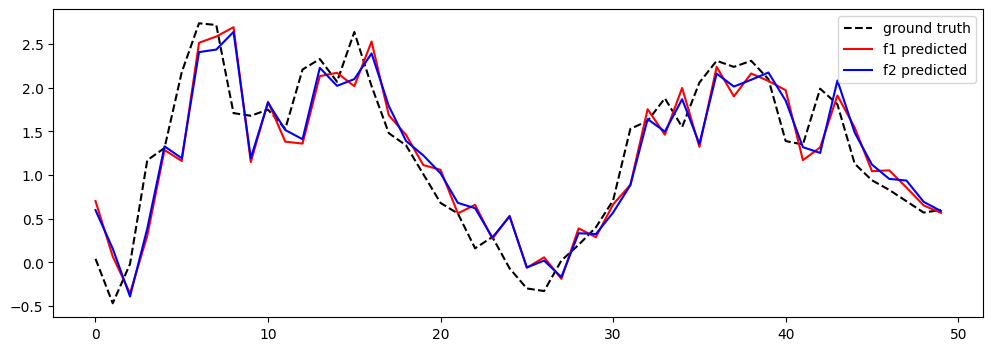

In [ ]:
# plot the results
plt.figure(figsize=(12,4))
plt.plot(ground_truth, label='ground truth', color='k', linestyle='--')
plt.plot(f1, label='f1 predicted', color='r')
plt.plot(f2, label='f2 predicted', color='b')
plt.legend()
plt.show()

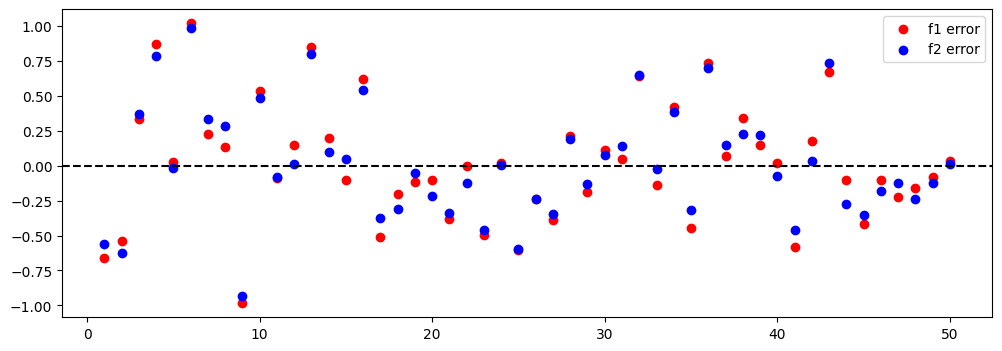

In [ ]:
# plot the results
plt.figure(figsize=(12,4))
plt.scatter(np.linspace(1,len(f1_error),len(f1_error)), f1_error, label='f1 error', color='r')
plt.scatter(np.linspace(1,len(f2_error),len(f2_error)), f2_error, label='f2 error', color='b')
plt.axhline(y=0, color='k', linestyle='--')
plt.legend()
plt.show()

The two models:AR(7), ARMA(2,[1,7]), were estimated using all available observations through 2000Q2 and the two one-step-ahead forecasts were obtained.

The bias of AR(7) is slightly smaller while the ARMA(2,[1,7]) has the smallest MSPE.

We need to ascertain whether these differences are statistically significant.


In [ ]:
s_2000_3q = ground_truth[0] # 책의 값이 잘못됨. 0.4가 아니라 0.04임.
f1_2000_3q = f1[0]
f2_2000_3q = f2[0]

f1 = pd.Series(f1)
f2 = pd.Series(f2)
f1_error = pd.Series(f1_error)
f2_error = pd.Series(f2_error)

print(f"Actual value:{round(s_2000_3q,3)}, f1 forecast:{round(f1_2000_3q,3)}, f2 forecast:{round(f2_2000_3q,3)}")
print(f"avg f1:{round(np.array(f1).mean(),4)}, avg f2:{round(np.array(f2).mean(),4)}")
print(f"var of f1:{round(np.array(f1).var(),4)}, var of f2:{round(np.array(f2).var(),4)}")
print(f'mean squared prediction error of f1: {round((f1_error**2).mean(),4)}, mean squared prediction error of f2: {round((f2_error**2).mean(),4)}')

Actual value:0.04, f1 forecast:0.702, f2 forecast:0.598
avg f1:1.2388, avg f2:1.24
var of f1:0.6155, var of f2:0.5907
mean squared prediction error of f1: 0.1822, mean squared prediction error of f2: 0.1655


In [ ]:
# Joint f-test for model 1
dta = pd.concat([pd.Series(f1,name='f1'), pd.Series(ground_truth,name='s')], axis=1)
dta.columns=['f1','s']
formula = 's ~ f1'
results = sm.OLS.from_formula(formula = formula, data = dta).fit()
hypotheses = '(Intercept = 0), (f1 = 1)'
f_test = results.f_test(hypotheses)
print(f_test)
print(results.params)

<F test: F=0.0830950341669716, p=0.9203957709207443, df_denom=48, df_num=2>
Intercept    0.046797
f1           0.973972
dtype: float64


In [ ]:
# Joint f-test for model 2
dta = pd.concat([pd.Series(f2,name='f2'), pd.Series(ground_truth,name='s')], axis=1)
dta.columns=['f2','s']
formula = 's ~ f2'
results = sm.OLS.from_formula(formula = formula, data = dta).fit()
hypotheses = '(Intercept = 0), (f2 = 1)'
f_test = results.f_test(hypotheses)
print(f_test)
print(results.params)

<F test: F=0.031553821057750994, p=0.9689588866346314, df_denom=48, df_num=2>
Intercept    0.003444
f2           1.008022
dtype: float64


There is strong evidence that both models have biased forecasts.

Next, consider the Granger–Newbold test for equal mean square prediction errors.

In [ ]:
x_i = f1_error + f2_error
z_i = f1_error - f2_error
corr_xz = x_i.corr(z_i,method='pearson')
Granger_Newbold_stats = corr_xz/ np.sqrt( (1-corr_xz**2)/49 )
print(Granger_Newbold_stats)

1.6836326098001706


With 49 degrees of freedom, a value of t = 1.68 is not statistically significant. We can conclude that the forecasting performance of the AR(7) is not statistically different from that of the ARMA(2,[1,7]).

Suppose that the cost of a forecast error rises extremely quickly in the size of the error. In such circumstances, the loss function might be best represented by the forecast error raised to the fourth power.

In [ ]:
d = np.power(f1_error, 4) - np.power(f2_error, 4)
DM = np.mean(d) / np.power(np.var(d) / (len(d) - 1), 0.5)
print(DM)

acf_d = acf(d, nlags=12)[1:]
print(acf_d)

2.461672505359249
[-0.11346578 -0.12071332  0.27244866  0.06566857  0.30074399 -0.03639361
 -0.01152261  0.08202927  0.0876488   0.00505515 -0.08040509  0.11900987]


The null hypothesis is that the models have equal forecasting accuracy, and the alternative hypothesis is that the forecast errors from the AR(2,[1,7]) are smaller than those of the AR(7). 

With 49 degrees of freedom, the t-value of 2.441 is significant at the 1.829% level. Hence, there is evidence in favor of the AR(2,[1,7]) model.

Finally, we can check if there is serial correlation in the fourth power error series.

The autocorrelation of lag 5 is quite high but many econometricians would dismiss it as spurious.

It does not seem plausible that correlations for 𝜌1 and 𝜌2 are actually close to zero while the correlation between lag 1 and lag 5 is very large. 

.



---



.

${\Large{\mathrm{Solution~for~Exercise~2.15}}}$

In [ ]:
m1, m2 = quarterly.M1NSA, quarterly.M2NSA
m1.index , m2.index = pd.to_datetime(m1.index), pd.to_datetime(m2.index)
m1.index.freq = 'QS-OCT'
m2.index.freq = 'QS-OCT'

A. Reproduce the results for M1 that are reported in Section 11 of the text.

1. AR(1) with Seasonal MA
2. Multiplicative Autoregressive
3. Multiplicative Moving Average

Both m1 and m2 time-series are non-stationary according to ADF test and KPSS test.

In [ ]:
print('ADF')
adf_test(m1)
print('KPSS')
kpss_test(m1)
print('---'*40)

print('ADF')
adf_test(m2)
print('KPSS')
kpss_test(m2)

ADF
Statistics: 2.2008838884988484
p-value: 0.9988832314920304
Critical values: {'1%': -3.4638151713286316, '5%': -2.876250632135043, '10%': -2.574611347821651}
KPSS
Statistics: 2.1300235888420835
bounded p-value: 0.01
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
------------------------------------------------------------------------------------------------------------------------
ADF
Statistics: 2.833190723716474
p-value: 1.0
Critical values: {'1%': -3.4633090972761744, '5%': -2.876029332045744, '10%': -2.5744932593252643}
KPSS
Statistics: 2.042423896605321
bounded p-value: 0.01
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


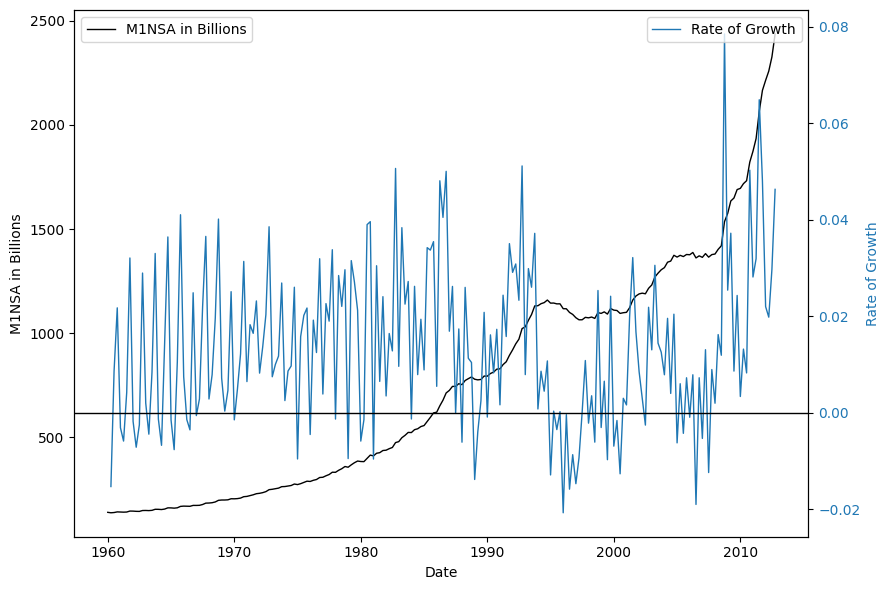

In [ ]:
# Figure for M1
fig, ax1 = plt.subplots(figsize=(9, 6))

color = 'black'
ax1.set_xlabel('Date')
ax1.set_ylabel('M1NSA in Billions', color=color)
ax1.plot(m1, color=color, linewidth=1, linestyle='-', label='M1NSA in Billions')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
m1_log_differenced = np.log(m1/m1.shift(1))
ax2.set_ylabel('Rate of Growth', color=color)  # we already handled the x-label with ax1
ax2.plot(np.log(m1/m1.shift(1)), color=color, linewidth=1, label='Rate of Growth')
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(y=0, color='black', linewidth=1)
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
print('ADF')
adf_test(m1_log_differenced.dropna())
print('KPSS')
kpss_test(m1_log_differenced.dropna())
print('---'*40)

ADF
Statistics: -3.2391248336053473
p-value: 0.017828777902494333
Critical values: {'1%': -3.4638151713286316, '5%': -2.876250632135043, '10%': -2.574611347821651}
KPSS
Statistics: 0.152467414248855
bounded p-value: 0.1
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


For m1 log differenced series, this appear to be stationary.

The ACF nad PACF of M1NSA exhibit the spikes at 4,8,12... which indicate the strong seasonality.

We already know that if the autocorrelations at the seasonal lags do not decay, it is necessary to take the seasonal difference.

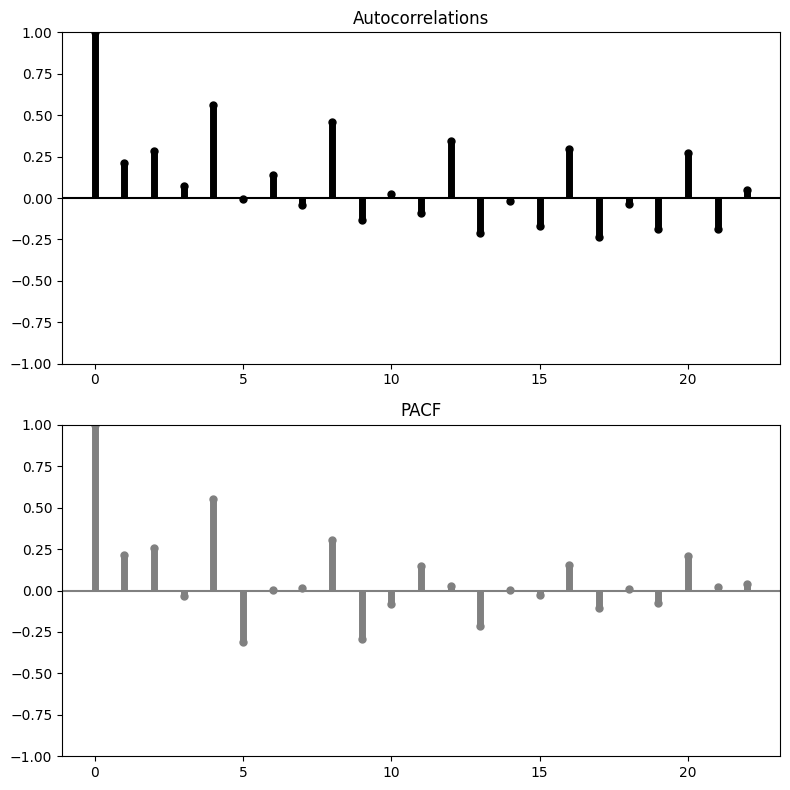

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 2*4))
plot_acf(m1_log_differenced.dropna(), lags=22, ax=axes[0], title='Autocorrelations', color='black',vlines_kwargs={'colors':'black','linewidth':5}, alpha=None)
plot_pacf(m1_log_differenced.dropna(), lags=22, ax=axes[1], method='ols', title='PACF', color='gray',vlines_kwargs={'colors':'gray','linewidth':5}, alpha=None)
plt.tight_layout()
plt.show()

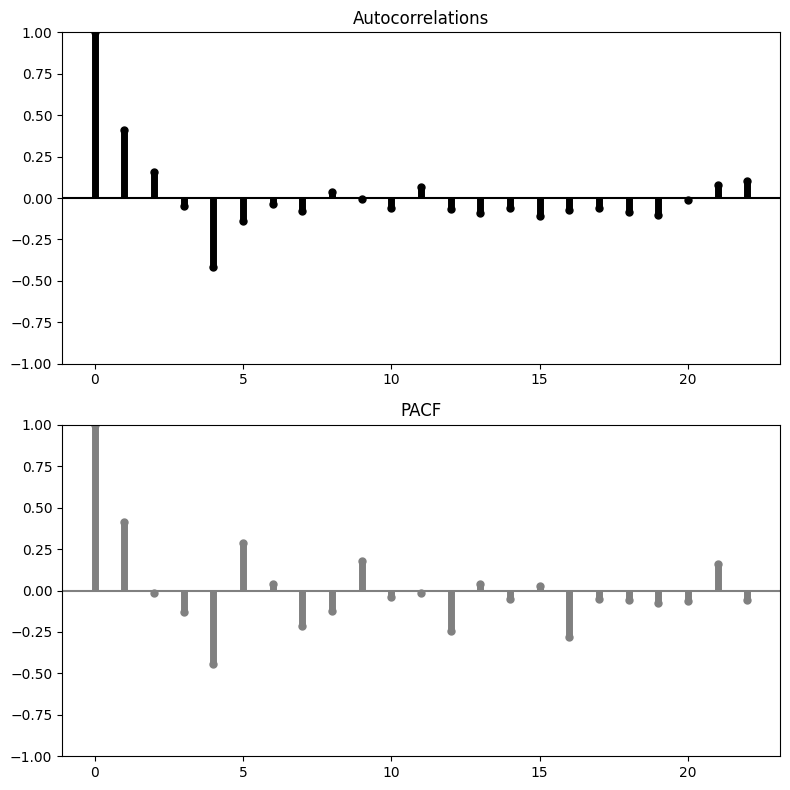

In [ ]:
m1_seasonal_difference = np.log(m1/m1.shift(4)).diff().dropna()
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 2*4))
plot_acf(m1_seasonal_difference, lags=22, ax=axes[0], title='Autocorrelations', color='black',vlines_kwargs={'colors':'black','linewidth':5}, alpha=None)
plot_pacf(m1_seasonal_difference, lags=22, ax=axes[1], method='ols', title='PACF', color='gray',vlines_kwargs={'colors':'gray','linewidth':5}, alpha=None)
plt.tight_layout()
plt.show()

To remove the strong seasonal persistence in the data, we need to take the seasonal difference.

The ACF and PACF are much more amenable to the Box–Jenkins methodology.

Also, ADF and KPSS test tell seasonally differenced m1 stationary.

In [ ]:
print('ADF')
adf_test(m1_seasonal_difference)
print('KPSS')
kpss_test(m1_seasonal_difference)
print('---'*40)

ADF
Statistics: -5.196951264040313
p-value: 8.918967291883798e-06
Critical values: {'1%': -3.465058702600837, '5%': -2.8767942675230356, '10%': -2.5749014492475535}
KPSS
Statistics: 0.03430026145196082
bounded p-value: 0.1
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [ ]:
# model_1: AR(1) with Seasonal AR term with lag 4
# model_2: Multiplicative Autoregressive
# model_3: Multiplicative Moving Average

model_1 = sm.tsa.statespace.SARIMAX(m1_seasonal_difference, trend='c', order=(1, 0, (0,0,0,1))).fit()
model_2 = sm.tsa.statespace.SARIMAX(m1_seasonal_difference, trend='c', order=(1, 0, 0), seasonal_order=(1,0,0,4)).fit()
model_3 = sm.tsa.statespace.SARIMAX(m1_seasonal_difference, trend='c', order=(0, 0, 1), seasonal_order=(0,0,1,4)).fit()
model_2_15_b = sm.tsa.statespace.SARIMAX(m1_seasonal_difference, trend='c', order=(0, 0, 1), seasonal_order=(1,0,0,4)).fit()

summary_table = dict()

idx=0
for model in [model_1, model_2, model_3,model_2_15_b]:
    res = model 
    # SSE i.e SSR, AIC, SBC, Ljung–Box Q-statistics of the residual autocorrelations for lag:={4, 8, 12}.
    temp_perf_dict = {key: key for key in ['SSE','AIC','SBC','Q(4)','Q(8)','Q(12)']}

    # Get the maximum value(s) from each element in the set
    max_values = [get_max_value(elem) for elem in lag]
    max_element = max(max_values)
    # We use spread[7-max_element:] to estimate each equation over the 1961Q4-2012Q4.
    temp_perf_dict['SSE'] = round(res.sse,3)

    # Note that since we assume the model errors are IID according to a normal distribution, the BIC and AIC formula is bit different from a general form.
    temp_perf_dict['AIC'] = round(num_of_obs*np.log(res.sse) + 2*len(res.params),3)
    temp_perf_dict['SBC'] = round(num_of_obs*np.log(res.sse) + len(res.params)*np.log(num_of_obs),3)

    # Lijung-box Q-statistics for lag 4,8,12
    q_statistics = res.test_serial_correlation(method='ljungbox',lags=12)[0] # *** Do we have to adjust chi-squared distribution with the degree of freedom? ***

    temp_perf_dict['Q(4)'] = {'q_stats' : round(q_statistics[0][3],2), 'p_val': round(q_statistics[1][3],3)}
    temp_perf_dict['Q(8)'] = {'q_stats' : round(q_statistics[0][7],2), 'p_val': round(q_statistics[1][7],3)}
    temp_perf_dict['Q(12)'] = {'q_stats' : round(q_statistics[0][11],2), 'p_val': round(q_statistics[1][11],3)}

    for param_name, param in zip(res.params.index, res.params):
        temp_perf_dict[param_name] = {'coef':round(param,3), 't_stats':round(res.tvalues[param_name],3)}

    hashable_order = tuple([tuple(order) if isinstance(order,list) == True else order for order in res.specification['order']]) # make res.specification['order'] hashable.
    hashable_s_order = tuple([tuple(s_order) if isinstance(s_order,list) == True else s_order for s_order in res.specification['seasonal_order']]) # make res.specification['order'] hashable.

    summary_table[(hashable_order,hashable_s_order)] = temp_perf_dict

In [ ]:
table_2_5 = pd.DataFrame()
for key, value in summary_table.items():
    temp_series = pd.Series(value, name=key)
    table_2_5 = pd.concat([table_2_5,temp_series],axis=1)

In [ ]:
table_2_5.loc[['ar.L1','ar.S.L4','ma.L1', 'ma.L4','ma.S.L4','SSE','AIC','SBC','Q(4)','Q(8)','Q(12)'],:] # For ordering the row of the table.

,"((1, 0, (4,)), (0, 0, 0, 0))","((1, 0, 0), (1, 0, 0, 4))","((0, 0, 1), (0, 0, 1, 4))","((0, 0, 1), (1, 0, 0, 4))"
ar.L1,"{'coef': 0.545, 't_stats': 10.262}","{'coef': 0.511, 't_stats': 9.785}",NaN,NaN
ar.S.L4,NaN,"{'coef': -0.522, 't_stats': -8.984}",NaN,"{'coef': -0.461, 't_stats': -7.391}"
ma.L1,NaN,NaN,"{'coef': 0.421, 't_stats': 6.038}","{'coef': 0.405, 't_stats': 6.717}"
ma.L4,"{'coef': -0.758, 't_stats': -16.128}",NaN,NaN,NaN
ma.S.L4,NaN,NaN,"{'coef': -0.714, 't_stats': -13.643}",NaN
SSE,0.026,0.03,0.029,0.032
AIC,-740.269,-712.591,-719.004,-696.073
SBC,-726.977,-699.299,-705.712,-682.781
Q(4),"{'q_stats': 2.66, 'p_val': 0.615}","{'q_stats': 4.82, 'p_val': 0.306}","{'q_stats': 26.88, 'p_val': 0.0}","{'q_stats': 19.1, 'p_val': 0.001}"
Q(8),"{'q_stats': 4.64, 'p_val': 0.795}","{'q_stats': 16.6, 'p_val': 0.035}","{'q_stats': 29.92, 'p_val': 0.0}","{'q_stats': 27.74, 'p_val': 0.001}"


For M1NSA, the point estimates of the coefficients all imply stationarity and invertibility.

The diagnostic statistics all suggest that model 1 is preferred.

Moreover, the Q-statistics for lags 4,8, and 12 indicate that the residual autocorrelations are insignificant.

In contrast, the residual correlations for model 2 are significant at the long lags:4,8.

Model 3 properly captures the seasonal pattern, but the MA(1) term does not capture the autoregressive decay present at the short lags.

Now for M1NSA, we will make out-of-sample forecasts based on the first model.

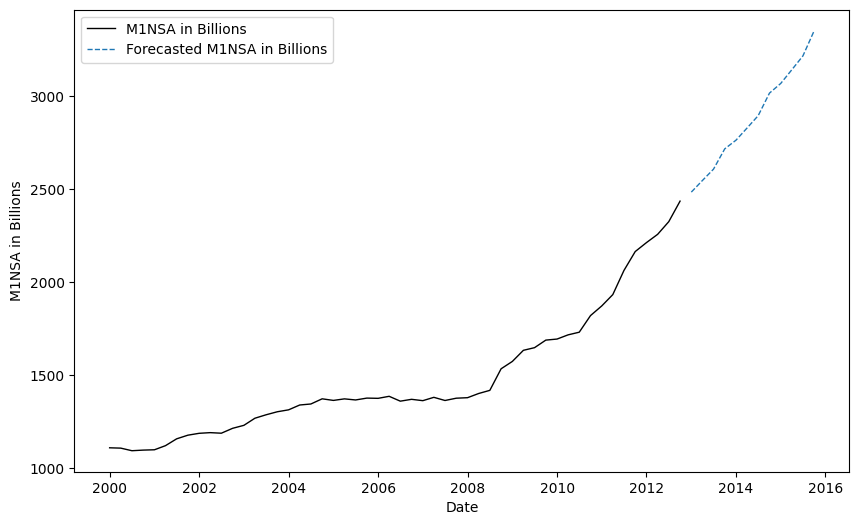

In [ ]:
forecasts_m1 = model_1.forecast(steps=12)
full_seasonal_diff = pd.concat([m1_seasonal_difference,forecasts_m1],axis=0)
real_scale_forecasts = m1.to_dict()

indexer = full_seasonal_diff.index
for idx in np.where(indexer>= '2013-01-01')[0]:
    temp_val = full_seasonal_diff[idx] + np.log(real_scale_forecasts[indexer[idx-1]]) + np.log(real_scale_forecasts[indexer[idx-4]]) - np.log(real_scale_forecasts[indexer[idx-5]])
    real_scale_forecasts[indexer[idx]] = np.exp(temp_val)

real_scale_forecasts_dataframe = pd.DataFrame.from_dict(real_scale_forecasts, orient='index')
real_scale_forecasts_dataframe.columns = ['M1 in Billions']

# Figure for M1
fig, ax1 = plt.subplots(figsize=(10, 6))

fitted = real_scale_forecasts_dataframe[(real_scale_forecasts_dataframe.index < '2013-01-01')*(real_scale_forecasts_dataframe.index >= '2000-01-01')]
predicted = real_scale_forecasts_dataframe[real_scale_forecasts_dataframe.index >= '2013-01-01']

color = 'black'
ax1.set_xlabel('Date')
ax1.set_ylabel('M1NSA in Billions', color=color)
ax1.plot(fitted, color=color, linewidth=1,  label='M1NSA in Billions')
ax1.plot(predicted, color='tab:blue', linewidth=1, linestyle='--', label='Forecasted M1NSA in Billions' )
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
plt.show()

2-15-b. How do the three models of M1 reported in the text compare to a model with a seasonal AR(1) term with an additive MA(1) term?

- Lack of additive AR terms make the model fail to capture the autoregressive decay at the short lags. Q-statistics for lags 4,8, and 12 all succeeded in rejecting the null-hypothesis.
- A seasonal AR(1) term fail isn't effective in fitting the seasonal pattern.
- In summary, in all diagonistic measures, the model_2_15_b is inferior to the three models of M1 reported in the text.

2-15-c. Obtain the ACF for the growth rate of the M2NSA series. What type of model is suggested by the ACF?
- The ACF does not decay exponentially, it suggests that the data may exhibit long-term dependencies and may not be adequately captured by a traditional autoregressive moving average (ARMA) model.
- In this case, additional differencing i.e. an autoregressive integrated moving average (ARIMA) or seasonal ARIMA (SARIMA) may be appropriate to account for the long-term dependencies in the data. 
- The combination of seasonal differencing and ARMA model is also doable.

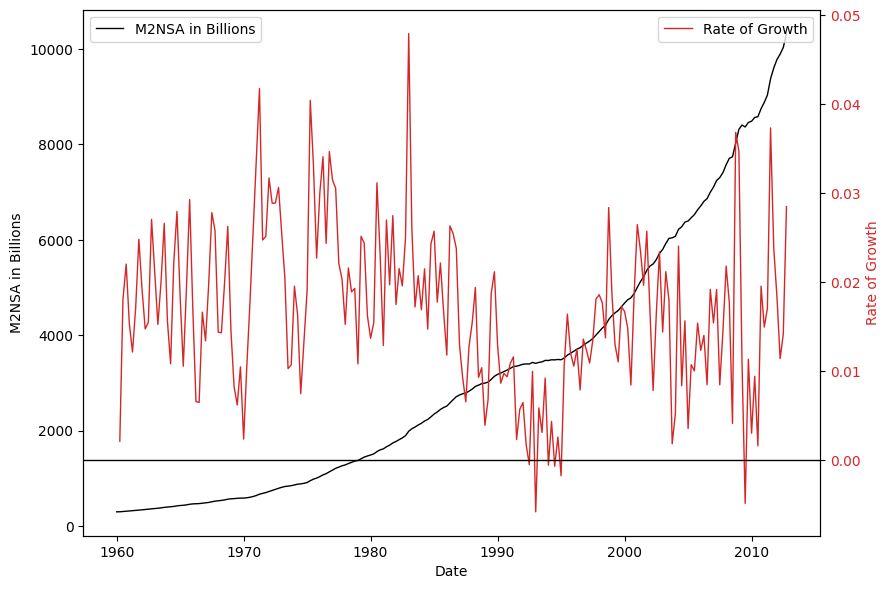

In [ ]:
# Figure for M2
fig, ax1 = plt.subplots(figsize=(9, 6))

color = 'black'
ax1.set_xlabel('Date')
ax1.set_ylabel('M2NSA in Billions', color=color)
ax1.plot(m2, color=color, linewidth=1, linestyle='-', label='M2NSA in Billions')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

m2_log_differenced = np.log(m2/m2.shift(1))
color = 'tab:red'
ax2.set_ylabel('Rate of Growth', color=color)  # we already handled the x-label with ax1
ax2.plot(m2_log_differenced, color=color, linewidth=1, label='Rate of Growth') # log differenced
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(y=0, color='black', linewidth=1)
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

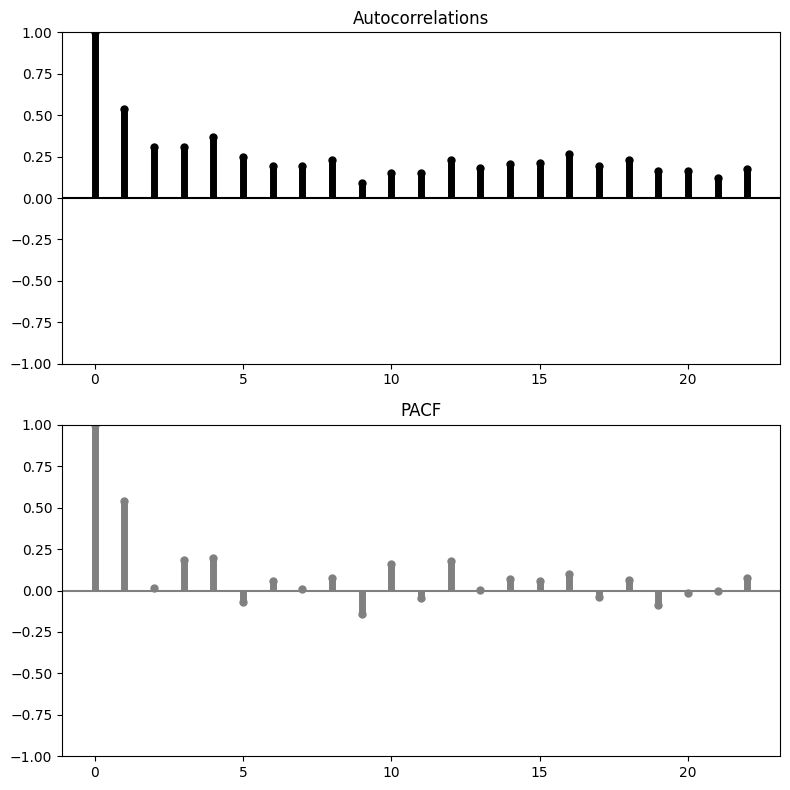

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 2*4))
plot_acf(m2_log_differenced.dropna(), lags=22, ax=axes[0], title='Autocorrelations', color='black',vlines_kwargs={'colors':'black','linewidth':5}, alpha=None)
plot_pacf(m2_log_differenced.dropna(), lags=22, ax=axes[1], method='ols', title='PACF', color='gray',vlines_kwargs={'colors':'gray','linewidth':5}, alpha=None)
plt.tight_layout()
plt.show()

Log difference doesn't make the time seris data stationary.

In [ ]:
print('ADF')
adf_test(m2_log_differenced.dropna())
print('---'*40)
print('KPSS')
kpss_test(m2_log_differenced.dropna())

ADF
Statistics: -2.3174722521550812
p-value: 0.1663947270336974
Critical values: {'1%': -3.4636447617687436, '5%': -2.8761761179270766, '10%': -2.57457158581854}
------------------------------------------------------------------------------------------------------------------------
KPSS
Statistics: 0.6140545734504733
bounded p-value: 0.02135867514086606
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


2-15-d. Estimate an AR(1) model with a seasonal MA term over the 1962:3 to 2014:4 period.

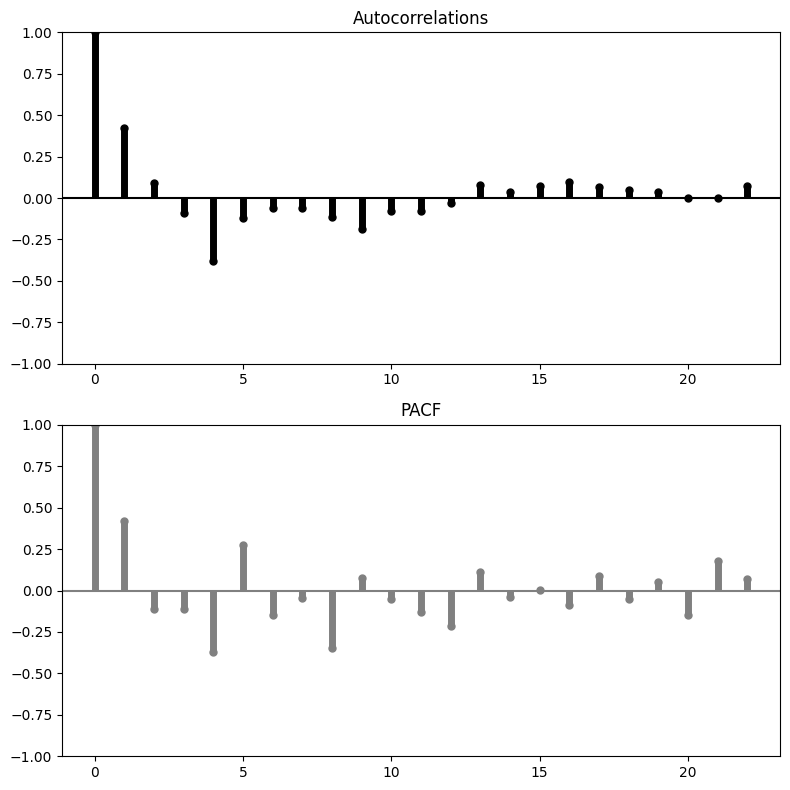

In [ ]:
m2_seasonal_difference = np.log(m2/m2.shift(4)).diff().dropna()
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 2*4))
plot_acf(m2_seasonal_difference, lags=22, ax=axes[0], title='Autocorrelations', color='black',vlines_kwargs={'colors':'black','linewidth':5}, alpha=None)
plot_pacf(m2_seasonal_difference, lags=22, ax=axes[1], method='ols', title='PACF', color='gray',vlines_kwargs={'colors':'gray','linewidth':5}, alpha=None)
plt.tight_layout()
plt.show()

Seasonal differencing makes the time-series stationary w.r.t ADF and KPSS test.

In [ ]:
print('ADF')
adf_test(m2_seasonal_difference)
print('---'*40)
print('KPSS')
kpss_test(m2_seasonal_difference)

ADF
Statistics: -6.730563004200422
p-value: 3.304229878790316e-09
Critical values: {'1%': -3.464337030867007, '5%': -2.876478799035722, '10%': -2.574733103221565}
------------------------------------------------------------------------------------------------------------------------
KPSS
Statistics: 0.024108414057588366
bounded p-value: 0.1
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [ ]:
# model_1: an AR(1) with a seasonal AR term
# model_2: an MA(1) with a seasonal AR term
# model_3: an MA(1) with a seasonal MA term

model_2_15_d = sm.tsa.statespace.SARIMAX(m2_seasonal_difference, trend='c', order=(1, 0, 0), seasonal_order=(0,0,1,4)).fit()
model_1 = sm.tsa.statespace.SARIMAX(m2_seasonal_difference, trend='c', order=(1, 0, 0), seasonal_order=(1,0,0,4)).fit()
model_2 = sm.tsa.statespace.SARIMAX(m2_seasonal_difference, trend='c', order=(0, 0, 1), seasonal_order=(1,0,0,4)).fit()
model_3 = sm.tsa.statespace.SARIMAX(m2_seasonal_difference, trend='c', order=(0, 0, 1), seasonal_order=(0,0,1,4)).fit()
summary_table = dict()

idx=0
for model in [model_2_15_d, model_1, model_2, model_3]:
    res = model 
    # SSE i.e SSR, AIC, SBC, Ljung–Box Q-statistics of the residual autocorrelations for lag:={4, 8, 12}.
    temp_perf_dict = {key: key for key in ['SSE','AIC','SBC','Q(4)','Q(8)','Q(12)']}

    # Get the maximum value(s) from each element in the set
    max_values = [get_max_value(elem) for elem in lag]
    max_element = max(max_values)
    # We use spread[7-max_element:] to estimate each equation over the 1961Q4-2012Q4.
    temp_perf_dict['SSE'] = round(res.sse,3)

    # Note that since we assume the model errors are IID according to a normal distribution, the BIC and AIC formula is bit different from a general form.
    temp_perf_dict['AIC'] = round(num_of_obs*np.log(res.sse) + 2*len(res.params),3)
    temp_perf_dict['SBC'] = round(num_of_obs*np.log(res.sse) + len(res.params)*np.log(num_of_obs),3)

    # Lijung-box Q-statistics for lag 4,8,12
    q_statistics = res.test_serial_correlation(method='ljungbox',lags=12)[0] # *** Do we have to adjust chi-squared distribution with the degree of freedom? ***

    temp_perf_dict['Q(4)'] = {'q_stats' : round(q_statistics[0][3],2), 'p_val': round(q_statistics[1][3],3)}
    temp_perf_dict['Q(8)'] = {'q_stats' : round(q_statistics[0][7],2), 'p_val': round(q_statistics[1][7],3)}
    temp_perf_dict['Q(12)'] = {'q_stats' : round(q_statistics[0][11],2), 'p_val': round(q_statistics[1][11],3)}

    for param_name, param in zip(res.params.index, res.params):
        temp_perf_dict[param_name] = {'coef':round(param,3), 't_stats':round(res.tvalues[param_name],3)}

    hashable_order = tuple([tuple(order) if isinstance(order,list) == True else order for order in res.specification['order']]) # make res.specification['order'] hashable.
    hashable_s_order = tuple([tuple(s_order) if isinstance(s_order,list) == True else s_order for s_order in res.specification['seasonal_order']]) # make res.specification['order'] hashable.

    summary_table[(hashable_order,hashable_s_order)] = temp_perf_dict

In [ ]:
table_2_15_d = pd.DataFrame()
for key, value in summary_table.items():
    temp_series = pd.Series(value, name=key)
    table_2_15_d = pd.concat([table_2_15_d,temp_series],axis=1)
    
table_2_15_d.loc[['ar.L1','ar.S.L4','ma.L1','ma.S.L4','SSE','AIC','SBC','Q(4)','Q(8)','Q(12)'],:] # For ordering the row of the table.

,"((1, 0, 0), (0, 0, 1, 4))","((1, 0, 0), (1, 0, 0, 4))","((0, 0, 1), (1, 0, 0, 4))","((0, 0, 1), (0, 0, 1, 4))"
ar.L1,"{'coef': 0.574, 't_stats': 11.238}","{'coef': 0.485, 't_stats': 8.733}",NaN,NaN
ar.S.L4,NaN,"{'coef': -0.461, 't_stats': -6.894}","{'coef': -0.451, 't_stats': -6.255}",NaN
ma.L1,NaN,NaN,"{'coef': 0.576, 't_stats': 11.199}","{'coef': 0.464, 't_stats': 7.153}"
ma.S.L4,"{'coef': -0.745, 't_stats': -12.183}",NaN,NaN,"{'coef': -0.624, 't_stats': -8.33}"
SSE,0.011,0.014,0.013,0.012
AIC,-911.109,-870.68,-874.954,-905.845
SBC,-897.817,-857.388,-861.662,-892.553
Q(4),"{'q_stats': 7.55, 'p_val': 0.109}","{'q_stats': 7.41, 'p_val': 0.116}","{'q_stats': 7.32, 'p_val': 0.12}","{'q_stats': 7.65, 'p_val': 0.105}"
Q(8),"{'q_stats': 9.81, 'p_val': 0.278}","{'q_stats': 27.12, 'p_val': 0.001}","{'q_stats': 27.55, 'p_val': 0.001}","{'q_stats': 11.68, 'p_val': 0.166}"
Q(12),"{'q_stats': 14.61, 'p_val': 0.264}","{'q_stats': 34.4, 'p_val': 0.001}","{'q_stats': 34.53, 'p_val': 0.001}","{'q_stats': 17.29, 'p_val': 0.139}"


The AR(1) model with a seasonal MA term is the most preferable with respect to SSE, AIC, and SBC.

Additionally, Q-statistics fail to reject the null-hypothesis.

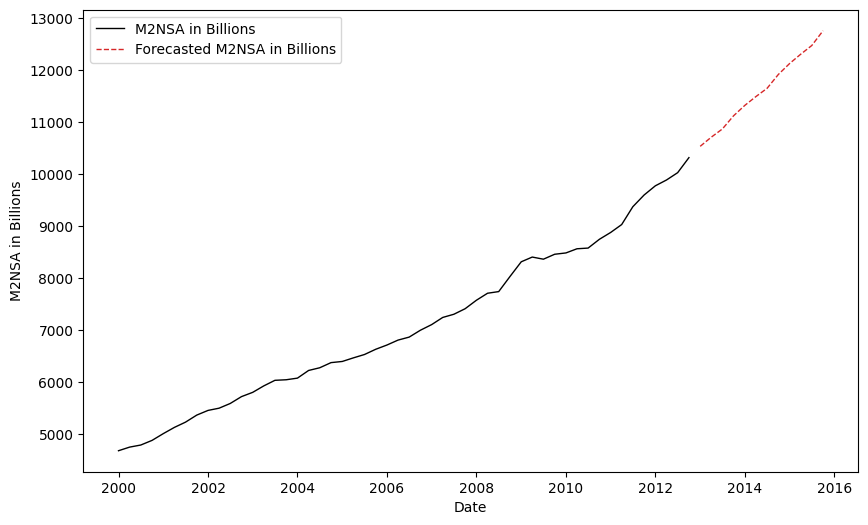

In [ ]:
forecasts_m2 = model_2_15_d.forecast(steps=12)
full_seasonal_diff = pd.concat([m2_seasonal_difference,forecasts_m2],axis=0)
real_scale_forecasts = m2.to_dict()

indexer = full_seasonal_diff.index
for idx in np.where(indexer>= '2013-01-01')[0]:
    temp_val = full_seasonal_diff[idx] + np.log(real_scale_forecasts[indexer[idx-1]]) + np.log(real_scale_forecasts[indexer[idx-4]]) - np.log(real_scale_forecasts[indexer[idx-5]])
    real_scale_forecasts[indexer[idx]] = np.exp(temp_val)

real_scale_forecasts_dataframe = pd.DataFrame.from_dict(real_scale_forecasts, orient='index')
real_scale_forecasts_dataframe.columns = ['M1 in Billions']

# Figure for M2
fig, ax1 = plt.subplots(figsize=(10, 6))

fitted = real_scale_forecasts_dataframe[(real_scale_forecasts_dataframe.index < '2013-01-01')*(real_scale_forecasts_dataframe.index >= '2000-01-01')]
predicted = real_scale_forecasts_dataframe[real_scale_forecasts_dataframe.index >= '2013-01-01']

color = 'black'
ax1.set_xlabel('Date')
ax1.set_ylabel('M2NSA in Billions', color=color)
ax1.plot(fitted, color=color, linewidth=1,  label='M2NSA in Billions')
ax1.plot(predicted, color='tab:red', linewidth=1, linestyle='--', label='Forecasted M2NSA in Billions' )
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
plt.show()

2-15-e. Would you recommend including an MA term at lag 2 to remove any remaining serial correlation in the residuals?

The serial correlation of models estimated with M2 is relatively higher than that of models fitted with M1.

We can surely include an MA term at lag 2.

In [ ]:
acf_2_15_e = acf(model_2_15_d.resid, nlags=12)[:]
print(acf_2_15_e)

[ 1.         -0.01653882 -0.17044907  0.07251068 -0.01614423  0.05290027
 -0.01291587  0.06179129 -0.0575172  -0.11092545  0.06399956 -0.00494367
 -0.07231674]


In [ ]:
model_4 = sm.tsa.statespace.SARIMAX(m2_seasonal_difference, trend='c', order=(2, 0, 0), seasonal_order=(0,0,1,4)).fit()
summary_table = dict()

idx=0
for model in [model_2_15_d, model_1, model_2, model_3, model_4]:
    res = model 
    # SSE i.e SSR, AIC, SBC, Ljung–Box Q-statistics of the residual autocorrelations for lag:={4, 8, 12}.
    temp_perf_dict = {key: key for key in ['SSE','AIC','SBC','Q(4)','Q(8)','Q(12)']}

    # Get the maximum value(s) from each element in the set
    max_values = [get_max_value(elem) for elem in lag]
    max_element = max(max_values)
    # We use spread[7-max_element:] to estimate each equation over the 1961Q4-2012Q4.
    temp_perf_dict['SSE'] = round(res.sse,3)

    # Note that since we assume the model errors are IID according to a normal distribution, the BIC and AIC formula is bit different from a general form.
    temp_perf_dict['AIC'] = round(num_of_obs*np.log(res.sse) + 2*len(res.params),3)
    temp_perf_dict['SBC'] = round(num_of_obs*np.log(res.sse) + len(res.params)*np.log(num_of_obs),3)

    # Lijung-box Q-statistics for lag 4,8,12
    q_statistics = res.test_serial_correlation(method='ljungbox',lags=12)[0] # *** Do we have to adjust chi-squared distribution with the degree of freedom? ***

    temp_perf_dict['Q(4)'] = {'q_stats' : round(q_statistics[0][3],2), 'p_val': round(q_statistics[1][3],3)}
    temp_perf_dict['Q(8)'] = {'q_stats' : round(q_statistics[0][7],2), 'p_val': round(q_statistics[1][7],3)}
    temp_perf_dict['Q(12)'] = {'q_stats' : round(q_statistics[0][11],2), 'p_val': round(q_statistics[1][11],3)}

    for param_name, param in zip(res.params.index, res.params):
        temp_perf_dict[param_name] = {'coef':round(param,3), 't_stats':round(res.tvalues[param_name],3)}

    hashable_order = tuple([tuple(order) if isinstance(order,list) == True else order for order in res.specification['order']]) # make res.specification['order'] hashable.
    hashable_s_order = tuple([tuple(s_order) if isinstance(s_order,list) == True else s_order for s_order in res.specification['seasonal_order']]) # make res.specification['order'] hashable.

    summary_table[(hashable_order,hashable_s_order)] = temp_perf_dict

table_2_15_e = pd.DataFrame()
for key, value in summary_table.items():
    temp_series = pd.Series(value, name=key)
    table_2_15_e = pd.concat([table_2_15_e,temp_series],axis=1)
    
table_2_15_e.loc[['ar.L1','ar.L2','ar.S.L4','ma.L1','ma.S.L4','SSE','AIC','SBC','Q(4)','Q(8)','Q(12)'],:] # For ordering the row of the table.

,"((1, 0, 0), (0, 0, 1, 4))","((1, 0, 0), (1, 0, 0, 4))","((0, 0, 1), (1, 0, 0, 4))","((0, 0, 1), (0, 0, 1, 4))","((2, 0, 0), (0, 0, 1, 4))"
ar.L1,"{'coef': 0.574, 't_stats': 11.238}","{'coef': 0.485, 't_stats': 8.733}",NaN,NaN,"{'coef': 0.605, 't_stats': 10.103}"
ar.L2,NaN,NaN,NaN,NaN,"{'coef': -0.119, 't_stats': -1.633}"
ar.S.L4,NaN,"{'coef': -0.461, 't_stats': -6.894}","{'coef': -0.451, 't_stats': -6.255}",NaN,NaN
ma.L1,NaN,NaN,"{'coef': 0.576, 't_stats': 11.199}","{'coef': 0.464, 't_stats': 7.153}",NaN
ma.S.L4,"{'coef': -0.745, 't_stats': -12.183}",NaN,NaN,"{'coef': -0.624, 't_stats': -8.33}","{'coef': -0.805, 't_stats': -16.378}"
SSE,0.011,0.014,0.013,0.012,0.011
AIC,-911.109,-870.68,-874.954,-905.845,-913.296
SBC,-897.817,-857.388,-861.662,-892.553,-896.681
Q(4),"{'q_stats': 7.55, 'p_val': 0.109}","{'q_stats': 7.41, 'p_val': 0.116}","{'q_stats': 7.32, 'p_val': 0.12}","{'q_stats': 7.65, 'p_val': 0.105}","{'q_stats': 6.26, 'p_val': 0.181}"
Q(8),"{'q_stats': 9.81, 'p_val': 0.278}","{'q_stats': 27.12, 'p_val': 0.001}","{'q_stats': 27.55, 'p_val': 0.001}","{'q_stats': 11.68, 'p_val': 0.166}","{'q_stats': 9.19, 'p_val': 0.326}"


The model with AR(2) term has diagonostic measure which is comparable to the AR(1) model with a seasonal MA term.
- The latter is better with respect to AIC but is worse in SBC.
- AR(2) term does account for the serial correlation at the shorter lag but the significance of the coefficient is not strong enough.
- When focusing on parsimony, excluding AR(2) term is appropriate. However, performace of out-of-sample forecasts of two models should not be neglected.